# Lab-4:
In this lab, we will examine some classifiers and the regularization concept in the classification problem.
Also, we will see

### Objectives:
1. KNN
2. Cross Validation


## Loading the digits dataset
Dataset of 10 classes, one for each digit (0-9) with (8*8) 64 features. Suitable for classification!

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# We will show why we didn't split a validation set.
print(x_train.shape)

(1437, 64)


## K nearest neighbour classifier
1. What are the pros and cons of KNN?

2. To increase the variance of KNN model, should we increase or decrease the K?

___
Let's do the same with KNN classifier.


Task: Rescale the features first.

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Complete the following 2 lines to scale both train and test sets
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score

# Write 4 lines to complete the task.
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
f_score = f1_score(y_test,y_pred,average='macro')

print(accuracy)
print(f_score)

0.9805555555555555
0.9811894003251374


Task: Let's tune the hyperparameter $n\_neighbors$ in the KNN classifier object using the cross-validation.

___
## Cross Validation
Cross validation comes as an alternative for the validation set splitting.

Note: that's why we didn't make a validation set.

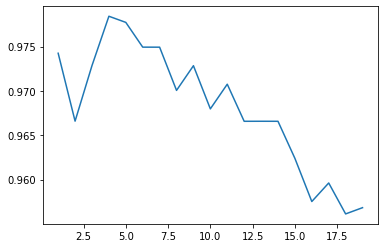

[0.9742498562294915, 0.9665944995094888, 0.9728561280064951, 0.9784208923920029, 0.9777274111159974, 0.9749365718345117, 0.9749331889990189, 0.9700619058895166, 0.9728425966645242, 0.9679780792260072, 0.9707587700010148, 0.9665775853320253, 0.966580968167518, 0.9665775853320253, 0.9623997834985285, 0.9575318832245188, 0.9596224755590136, 0.9561347721660295, 0.9568384019485132]
Best K: 4


In [4]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

Ks = list(range(1, 20))
cv_scores = []
for K in Ks:
    knn = KNeighborsClassifier(n_neighbors=K)
    # Write 2 lines of code, one to compute the CV scores.
    # And another to calculate the average.
    scores = cross_val_score(knn,x_train,y_train,cv=7,scoring='accuracy')
    avg_score = scores.mean()
    # Task ends

    cv_scores.append(avg_score)

plt.plot(Ks, cv_scores)
plt.show()
print(cv_scores)
print("Best K:", Ks[np.argmax(cv_scores)])

In KNN classifier, there're several hyperparamters to tune, tuning them one by one is exhaustive approach.
Let's try a better approach called GridSearchCV.


### GridSearchCV
In GridSearch Cross-validation, you give different values for each hyperparamter and it will try all combinations for you.
At the end, it will return the best combination of hyperparamters that got the best cross-validation score.

Task:
Use gridsearch to tune 3 hyperparameters:

1. $n\_neighbors$: [1, 2, . . ., 10]
2. $weights$: ['uniform', 'distance']
3. $metric$: ['euclidean', 'manhattan', 'chebyshev', 'cosine']

Check this [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html) for help.

Then measure the accuracy on the testset.

In [5]:
from sklearn.model_selection import GridSearchCV

# Write 2 lines of code to run GridSearchCV with cv=7 to tune the above hyperparams.
param_grid = {'n_neighbors':range(1,11),
'weights':['uniform','distance'],
'metric':['euclidean','manhattan','chebyshev','cosine']
}

grid_search_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=7,scoring='accuracy')

# Task ends here!

grid_search_clf.fit(x_train, y_train)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

y_pred = grid_search_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.974 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.974 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.967 (+/-0.010) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.974 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.973 (+/-0.010) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.976 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.978 (+/-0.007) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.980 (+/-0.012) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.978 (+/-0.007) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.979 (+/-0.009) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.975 (+/-0.019) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.981 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 